In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import importlib
import models
import utils
import numpy as np

path = './osfstorage-archive/Experiment 1/twostep_data_study1/'
paths = [path + x for x in os.listdir(path) if x.endswith('.csv')]

In [6]:
importlib.reload(models)

<module 'models' from '/Users/benjidayan/coding/model_free_based/models.py'>

In [7]:
beta= 4
diff = 0.3  # e,g, if rew prob est 1 is 0.7 and other is 0.4

np.exp(beta * diff) / (1 + np.exp(beta*diff))

0.7685247834990176

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:06<00:00, 15.42it/s]


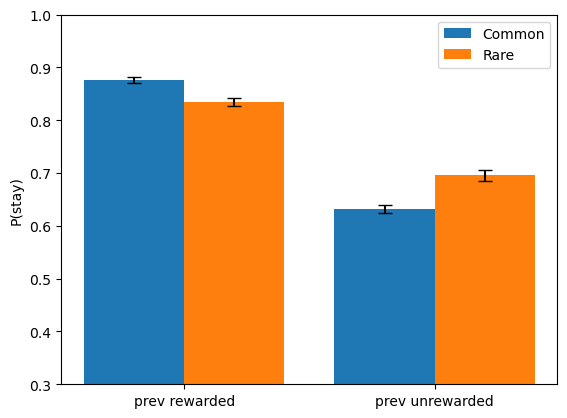

In [8]:
#### Get big bar plot
from tqdm import tqdm

# Each element is a list of 4 numbers for that subject, of
# rew com, rew rare, unrew com, unrew rare
# subject_mean_stay_probs = []
# subject_mean_model_stay_probs = []
model_empirical_stay_probs = []
model_mean_of_stay_probs = []
beta_stage2 = 8.0
beta_mf0 = 0.0
beta_mf1 =0.0
beta_stick = 0.0
beta_mb = 0.0
Q_MB_rare_prob = 0.3

N = 100


### MB
beta_mb = 10.0
beta_mf1 = 10.0
for fn in tqdm(paths[:N]):
    model = models.Model(alpha=0.15, beta_stage2=beta_stage2, beta_mf0=beta_mf0, beta_mf1=beta_mf1, beta_stick=beta_stick,
                beta_mb=beta_mb, Q_MB_rare_prob=Q_MB_rare_prob)
    
    model_empirical_stay_prob, model_mean_of_stay_prob, df_outs = utils.run_model_on_file(fn, model)
    model_empirical_stay_probs.append(model_empirical_stay_prob)
    model_mean_of_stay_probs.append(model_mean_of_stay_prob)
utils.plot_4_case_empirical_stay_probs(model_empirical_stay_probs)
plt.show()

# ### MF0
# beta_mf0 = 10.0
# beta_mb = 0.0
# model_empirical_stay_probs = []
# model_mean_of_stay_probs = []
# for fn in tqdm(paths[:N]):
#     model = models.Model(alpha=0.15, beta_stage2=beta_stage2, beta_mf0=beta_mf0, beta_mf1=beta_mf1, beta_stick=beta_stick,
#                 beta_mb=beta_mb, Q_MB_rare_prob=Q_MB_rare_prob)
    
#     model_empirical_stay_prob, model_mean_of_stay_prob, df_outs = models.run_model_on_file(fn, model)
#     model_empirical_stay_probs.append(model_empirical_stay_prob)
#     model_mean_of_stay_probs.append(model_mean_of_stay_prob)
# models.plot_4_case_empirical_stay_probs(model_empirical_stay_probs)
# plt.show()

# ### MF1
# beta_mf0 = 0.0
# beta_mf1 = 10.0
# model_empirical_stay_probs = []
# model_mean_of_stay_probs = []
# for fn in tqdm(paths[:N]):
#     model = models.Model(alpha=0.15, beta_stage2=beta_stage2, beta_mf0=beta_mf0, beta_mf1=beta_mf1, beta_stick=beta_stick,
#                 beta_mb=beta_mb, Q_MB_rare_prob=Q_MB_rare_prob)
    
#     model_empirical_stay_prob, model_mean_of_stay_prob, df_outs = models.run_model_on_file(fn, model)
#     model_empirical_stay_probs.append(model_empirical_stay_prob)
#     model_mean_of_stay_probs.append(model_mean_of_stay_prob)
# models.plot_4_case_empirical_stay_probs(model_empirical_stay_probs)
plt.show()


In [38]:
df_outs

,choice1,stage2,choice2,reward,probs1,probs2,Qstage2,Q_MB,Q_MF0,Q_MF1,stay,prev_rew,common_trans,prev_common_trans,stay_prob
1,1,1,1,0,"[0.5744425168116591, 0.42555748318834086]","[[0.6456563062257953, 0.3543436937742046], [0....","[[0.575, 0.5], [0.5, 0.425]]","[0.5525, 0.5225]","[0.5, 0.5]","[0.5, 0.48874999999999996]",True,True,True,False,0.425557
2,1,0,0,1,"[0.5744425168116591, 0.42555748318834086]","[[0.6456563062257953, 0.3543436937742046], [0....","[[0.6387499999999999, 0.5], [0.5, 0.425]]","[0.5971249999999999, 0.5416249999999999]","[0.5, 0.51125]","[0.5, 0.5654374999999999]",True,False,False,True,0.425557
3,0,1,0,1,"[0.6088545692109505, 0.3911454307890494]","[[0.7521291114395701, 0.24787088856042994], [0...","[[0.6387499999999999, 0.5], [0.575, 0.425]]","[0.6196249999999999, 0.5941249999999999]","[0.5, 0.51125]","[0.575, 0.5654374999999999]",False,True,False,False,0.391145
4,1,1,0,1,"[0.535564837983854, 0.46443516201614604]","[[0.7521291114395701, 0.24787088856042994], [0...","[[0.6387499999999999, 0.5], [0.638749999999999...","[0.6387499999999999, 0.6387499999999999]","[0.5, 0.5208124999999999]","[0.575, 0.6306218749999999]",False,True,True,False,0.535565
5,0,1,0,1,"[0.44815575554474013, 0.5518442444552599]","[[0.7521291114395701, 0.24787088856042994], [0...","[[0.6387499999999999, 0.5], [0.6929375, 0.425]]","[0.6550062499999999, 0.6766812499999999]","[0.5208125, 0.5208124999999999]","[0.6387499999999999, 0.6306218749999999]",False,True,False,True,0.551844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,1,1,0,1,"[0.30329547896285697, 0.6967045210371431]","[[0.16443698121260097, 0.835563018787399], [0....","[[0.16991352464994353, 0.37311082061908063], [...","[0.4326200248941128, 0.5119656305941557]","[0.4943060324095808, 0.5234963646850507]","[0.40479727941033156, 0.44090717199779983]",False,False,True,True,0.303295
194,0,0,1,1,"[0.2524931442835774, 0.7475068557164227]","[[0.16443698121260097, 0.835563018787399], [0....","[[0.16991352464994353, 0.4671441975262185], [0...","[0.49844338872910926, 0.540175643666297]","[0.4761267506410058, 0.5234963646850507]","[0.4940776874987818, 0.44090717199779983]",False,True,True,True,0.747507
195,1,1,0,1,"[0.2908996503595583, 0.7091003496404418]","[[0.08487777283252655, 0.9151222271674735], [0...","[[0.16991352464994353, 0.4671441975262185], [0...","[0.5177270211599958, 0.5851707860050323]","[0.4761267506410058, 0.5306931352126713]","[0.4940776874987818, 0.5247710961981299]",False,True,True,True,0.290900
196,1,1,0,0,"[0.22791858997826495, 0.772081410021735]","[[0.08487777283252655, 0.9151222271674735], [0...","[[0.16991352464994353, 0.4671441975262185], [0...","[0.4891181087262494, 0.5184166569929574]","[0.4761267506410058, 0.546452206376592]","[0.4940776874987818, 0.4460554317684104]",True,True,True,True,0.772081


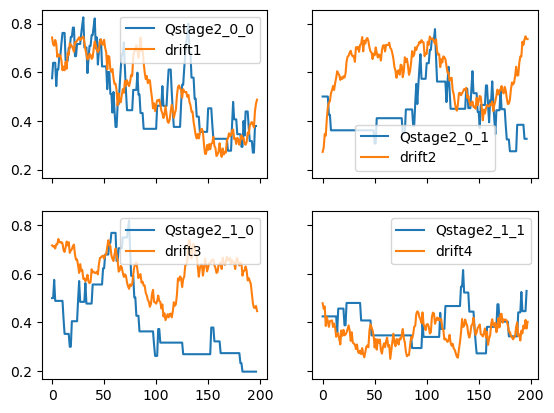

In [30]:
qstage2_arr = np.stack(df_outs.Qstage2)
qstage2_plot(qstage2_arr, df)


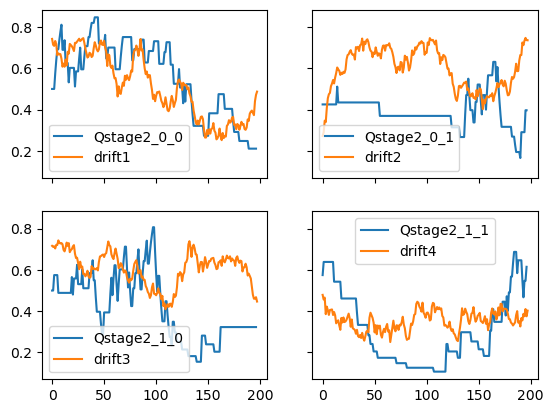

In [33]:
qstage2_arr = np.stack(df_outs.Qstage2)
qstage2_plot(qstage2_arr, df)
